x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration 0/300 : loss 0.999965
iteration 10/300 : loss 0.819972
iteration 20/300 : loss 0.810081
iteration 30/300 : loss 0.804965
iteration 40/300 : loss 0.801612
iteration 50/300 : loss 0.799164
iteration 60/300 : loss 0.797248
iteration 70/300 : loss 0.795673
iteration 80/300 : loss 0.794337
iteration 90/300 : loss 0.793177
iteration 100/300 : loss 0.792156
iteration 110/300 : loss 0.791246
iteration 120/300 : loss 0.790428
iteration 130/300 : loss 0.789687
iteration 140/300 : loss 0.789013
iteration 150/300 : loss 0.788396
iteration 160/300 : loss 0.787829
iteration 170/300 : loss 0.787305
iteration 180/300 : loss 0.786820
iteration 190/300 : loss 0.786369
iteration 200/300 : loss 0.785949
iteration 210/300 : loss 0.785555
iteration 220/300 : loss 0.785186
iteration 230/300 : loss 0.784839
iteration 240/300 : loss 0.784512
iteration 250/300 : loss 0.784203
iteration 260/300 : loss 0.783910
iteration 270/300 : loss 0.783633
itera

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

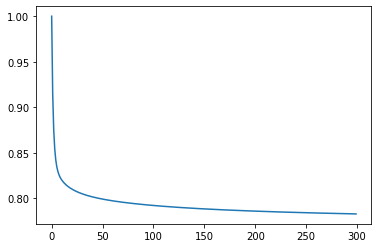

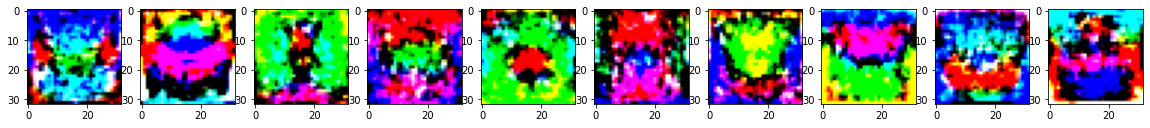

train_accuracy =  0.755468888888889
test_accuracy =  0.7488888888888889


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST


# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image



y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr


iterations =300
lr =1.4e-2
lr_decay=0.999
reg =5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
  indices = np.arange(Ntr)
  rng.shuffle(indices)
  x=x_train[indices]
  y=y_train[indices]

  # Forward pass
  y_pred=x.dot(w1)+b1
  l=1/batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1)
  loss_history.append(l)

  if t%10==0:
    print('iteration %d/%d : loss %f'%(t,iterations,l))


  # Backward pass
  dy_pred=1./batch_size*2.0*(y_pred-y)
  db_1=dy_pred.sum()
  dw_1=x.T.dot(dy_pred)+reg*w1
  w1-=lr*dw_1
  b1-=lr*db_1
  lr*=lr_decay


# Printing accuracies and displaying w as images
plt.plot(loss_history)
fig,ax=plt.subplots(1,10)
fig.set_size_inches(20,10)

for i in range(10):
  img=w1[:,i].reshape(32,32,3)
  ax[i].imshow(img*1000)
plt.show()

y_pred1=x_train.dot(w1)+b1
train_acc=1.0-1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1)-np.argmax(y_pred1,axis=1))).sum()
print('train_accuracy = ',train_acc)

y_pred2=x_test.dot(w1)+b1
test_acc=1.0-1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1)-np.argmax(y_pred2,axis=1))).sum()
print('test_accuracy = ',test_acc)
